In [1]:
from skil import Skil, WorkSpace, Experiment, Model, Deployment

Using TensorFlow backend.


In [3]:
skil_server = Skil(
    host='localhost',
    port=9008,
    user_id='admin',
    password='Skymind'
)

work_space = WorkSpace(skil=skil_server, name='tf-yolo')
experiment = Experiment(work_space=work_space, name='yolo-experiment')
model      = Model(model='yolo2.pb', name='yolo', experiment=experiment)
deployment = Deployment(skil=skil_server,name='yolo-dep')

'>>> Authenticating SKIL...'
'>>> Done!'
'>>> Uploading model, this might take a while...'
[   {'file_content': None,
 'file_name': 'yolo2.pb',
 'key': 'file',
 'path': '/opt/skil/plugins/files/MODEL/yolo2.pb',
 'status': 'uploaded',
 'type': None}]


In [6]:
service = model.deploy(deployment=deployment, input_names=['input'], output_names=['output'])

{'created': 1554893166733,
 'deployment_id': 0,
 'extra_args': None,
 'file_location': None,
 'id': 0,
 'jvm_args': None,
 'labels_file_location': None,
 'launch_policy': {'@class': 'io.skymind.deployment.launchpolicy.DefaultLaunchPolicy',
                   'maxFailuresMs': 300000,
                   'maxFailuresQty': 3},
 'model_state': None,
 'model_type': 'model',
 'name': 'yolo',
 'scale': 1.0,
 'state': 'stopped',
 'sub_type': None,
 'updated': None}
'>>> Starting to serve model...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Model server started successfully!'


## Prediction

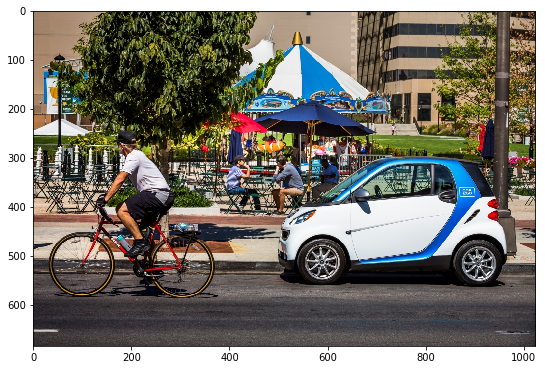

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("images/img-1.jpg")
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
image.shape

(683, 1024, 3)

In [14]:
# service.detect_objects(image)

In [ ]:

detection = service.detect_objects(image)
image = skil.utils.yolo.annotate_image(image, detection)
cv2.imwrite('annotated.jpg', image)
